In [1]:
import piplite
await piplite.install(['numpy'])
await piplite.install(['pandas'])
await piplite.install(['seaborn'])

In [2]:
# pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

<ipython-input-2-cde6ab162d36>:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
from js import fetch
import io

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
resp = await fetch(URL)
dataset_part_2_csv = io.BytesIO((await resp.arrayBuffer()).to_py())
df=pd.read_csv(dataset_part_2_csv)
df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


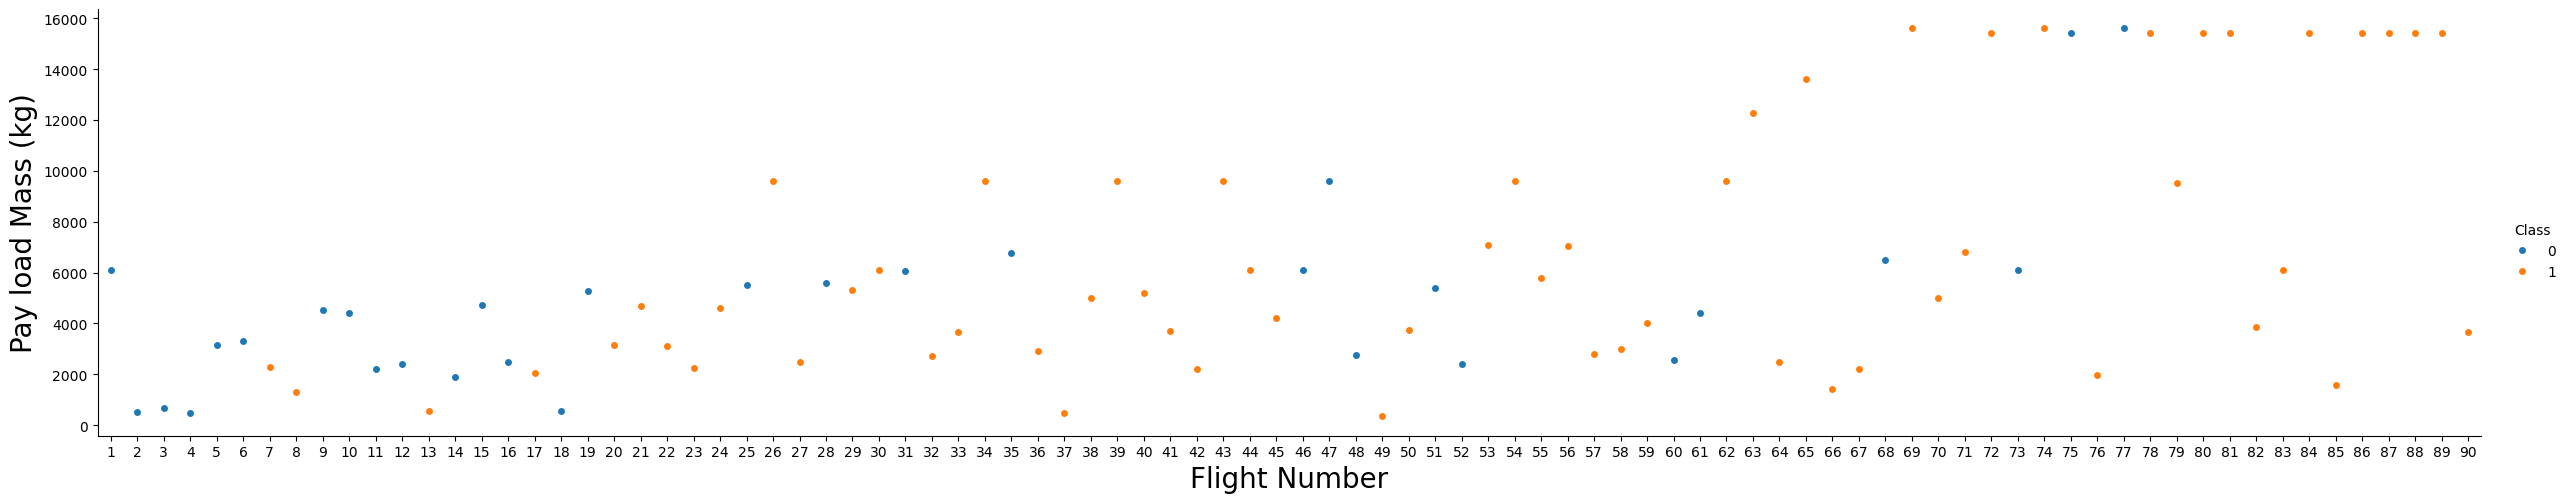

In [4]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

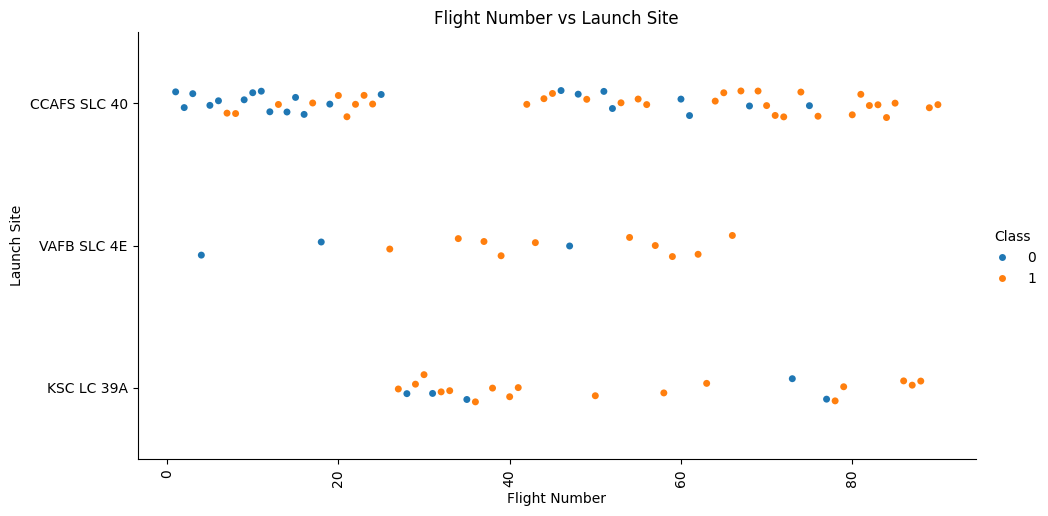

In [5]:
# Plot FlightNumber vs LaunchSite with hue based on class
sns.catplot(data=df, x="FlightNumber", y="LaunchSite", hue="Class", kind="strip", height=5, aspect=2)

plt.title("Flight Number vs Launch Site")
plt.xlabel("Flight Number")
plt.ylabel("Launch Site")
plt.xticks(rotation=90)
plt.show()

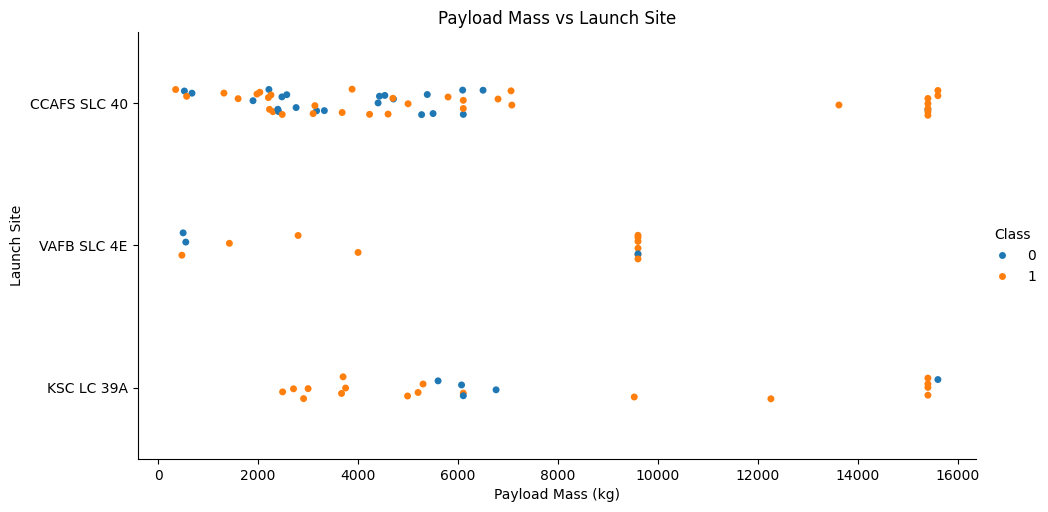

In [6]:
# Plot PayloadMass vs LaunchSite with hue based on class
sns.catplot(data=df, x="PayloadMass", y="LaunchSite", hue="Class", kind="strip", height=5, aspect=2)

plt.title("Payload Mass vs Launch Site")
plt.xlabel("Payload Mass (kg)")
plt.ylabel("Launch Site")
plt.show()

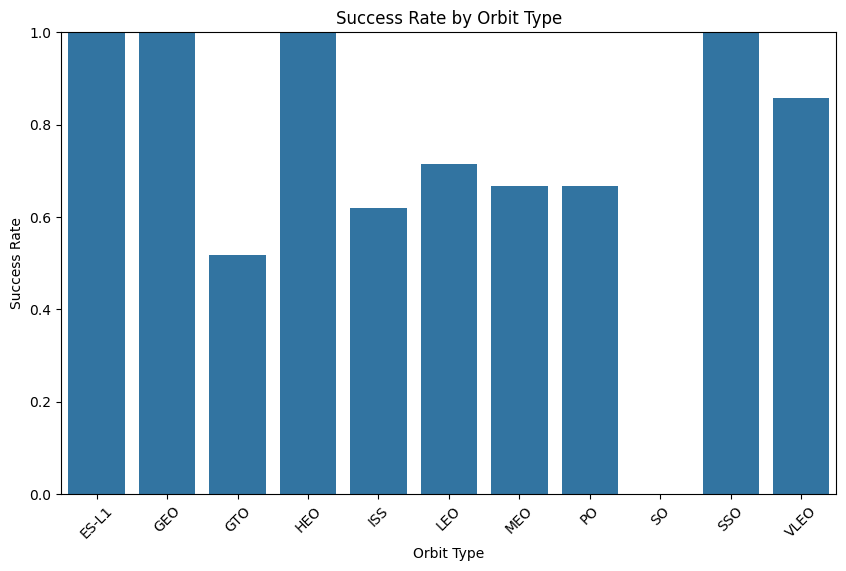

In [7]:
# Group by Orbit and calculate mean success rate
orbit_success_rate = df.groupby('Orbit')['Class'].mean().reset_index()

# Plot as a bar chart
plt.figure(figsize=(10,6))
sns.barplot(data=orbit_success_rate, x='Orbit', y='Class')

plt.title('Success Rate by Orbit Type')
plt.xlabel('Orbit Type')
plt.ylabel('Success Rate')
plt.xticks(rotation=45)
plt.ylim(0, 1)  # since it's a rate
plt.show()

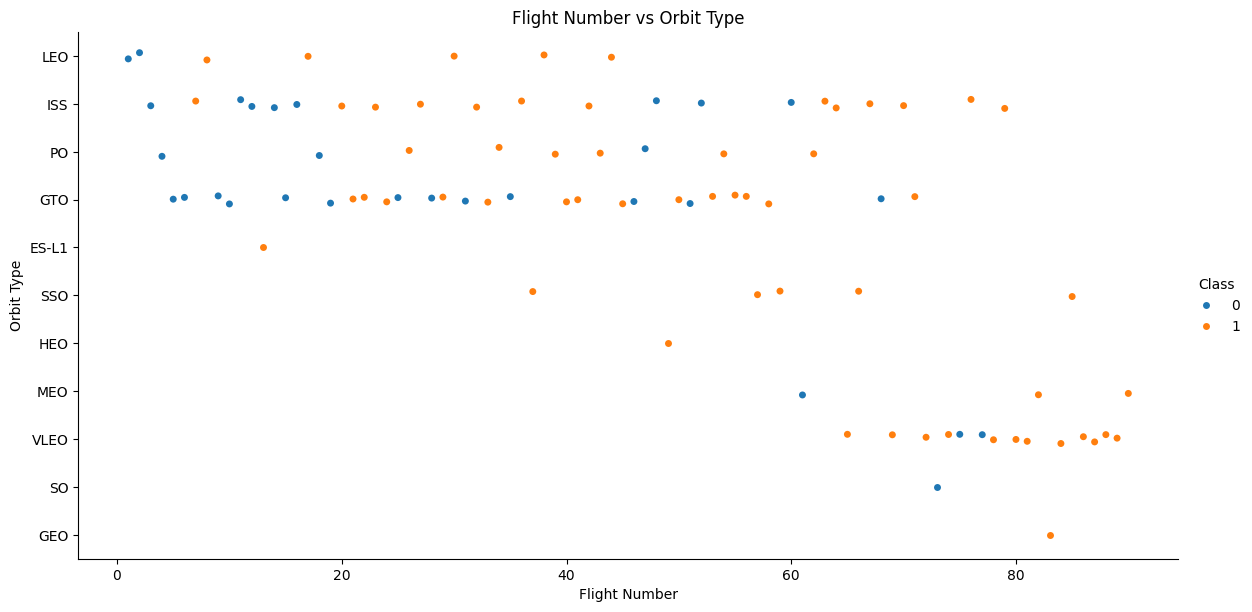

In [8]:
sns.catplot(
    data=df,
    x="FlightNumber",
    y="Orbit",
    hue="Class",
    kind="strip",
    height=6,
    aspect=2
)

plt.title("Flight Number vs Orbit Type")
plt.xlabel("Flight Number")
plt.ylabel("Orbit Type")
plt.show()

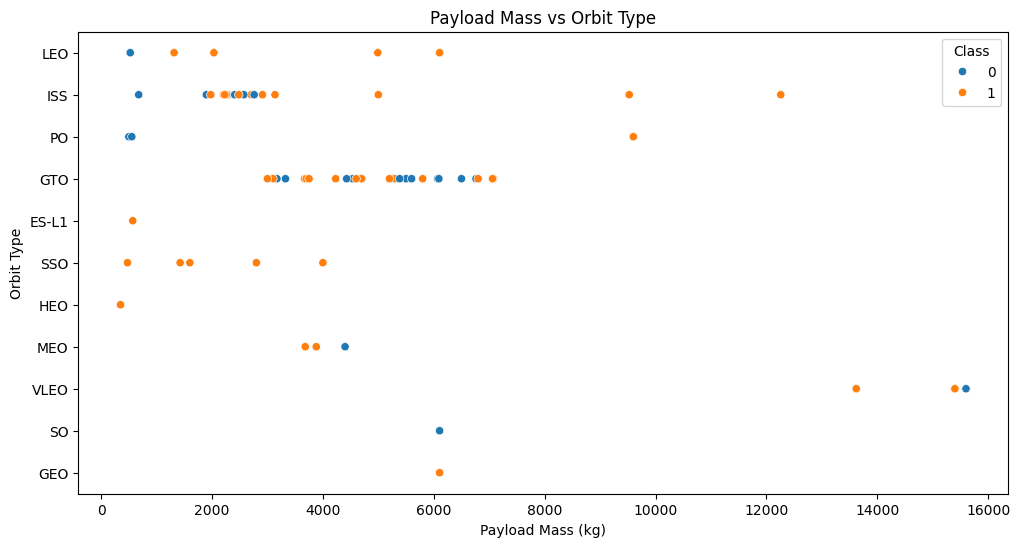

In [9]:
plt.figure(figsize=(12,6))
sns.scatterplot(
    data=df,
    x="PayloadMass",
    y="Orbit",
    hue="Class"
)

plt.title("Payload Mass vs Orbit Type")
plt.xlabel("Payload Mass (kg)")
plt.ylabel("Orbit Type")
plt.show()

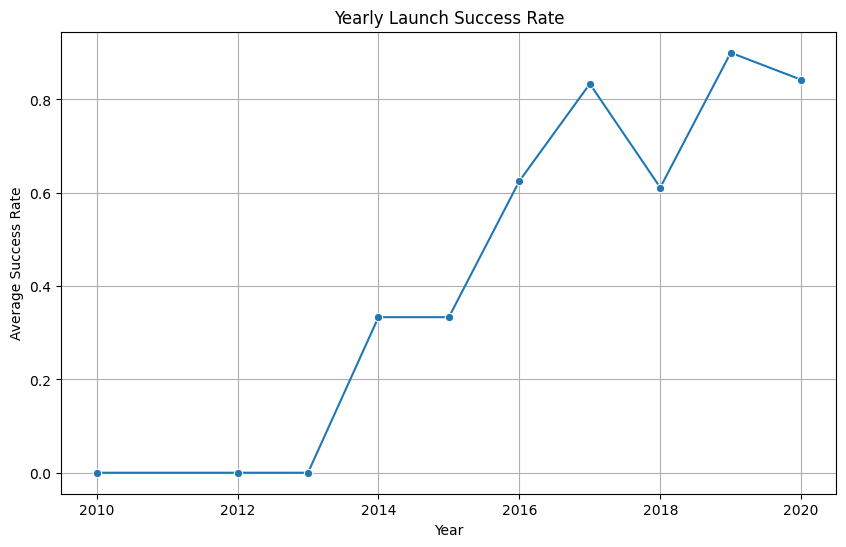

In [10]:
# Ensure the Date column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract year into a new column
df['Year'] = df['Date'].dt.year

# Group by Year and compute mean success rate
yearly_success = df.groupby('Year')['Class'].mean().reset_index()

# Plotting
plt.figure(figsize=(10,6))
sns.lineplot(data=yearly_success, x='Year', y='Class', marker='o')
plt.title('Yearly Launch Success Rate')
plt.xlabel('Year')
plt.ylabel('Average Success Rate')
plt.grid(True)
plt.show()

In [11]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


In [12]:
categorical_cols = ['Orbit', 'LaunchSite', 'LandingPad', 'Serial']
# One-hot encode these columns using get_dummies
features_one_hot = pd.get_dummies(df, columns=categorical_cols)
# Display the result
features_one_hot.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Outcome,Flights,GridFins,Reused,Legs,Block,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,2010-06-04,Falcon 9,6104.959412,None None,1,False,False,False,1.0,...,False,False,False,False,False,False,False,False,False,False
1,2,2012-05-22,Falcon 9,525.000000,None None,1,False,False,False,1.0,...,False,False,False,False,False,False,False,False,False,False
2,3,2013-03-01,Falcon 9,677.000000,None None,1,False,False,False,1.0,...,False,False,False,False,False,False,False,False,False,False
3,4,2013-09-29,Falcon 9,500.000000,False Ocean,1,False,False,False,1.0,...,False,False,False,False,False,False,False,False,False,False
4,5,2013-12-03,Falcon 9,3170.000000,None None,1,False,False,False,1.0,...,False,False,False,False,False,False,False,False,False,False


In [13]:
features_one_hot = features_one_hot.astype('float64')

features_one_hot.dtypes

<class 'TypeError'>: Cannot cast DatetimeArray to dtype float64

In [14]:
features_one_hot = features_one_hot.select_dtypes(include=['number'])
features_one_hot = features_one_hot.astype('float64')

print(features_one_hot.dtypes)

FlightNumber    float64
PayloadMass     float64
Flights         float64
Block           float64
ReusedCount     float64
Longitude       float64
Latitude        float64
Class           float64
Year            float64
dtype: object


In [15]:
features_one_hot.to_csv('dataset_part_3.csv', index=False)

In [16]:
features_one_hot.shape[1]

9